# KNN - Implementação do algoritmo K-vizinhos mais próximos

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base = pd.read_csv("base_conhecimento.csv")
classificar = pd.read_csv("registros_para_classificar.csv")

In [3]:
def dist_euclidiana(a : list, b : list) -> float | None:
    if len(a) != len(b):
        return
    return (sum([(m - n)**2 for m, n in zip(a,b)])) * (1/2)

- Abaixo, a implementação do algoritmo KNN

In [90]:
def k_vizinhos_proximos(base, classificacao, k : int):
    base_tratada = base.drop(columns=["Species"]).values
    classificacao = classificacao.values
    
    classes = []
    for i in range(len(classificacao)):
        distancias = [dist_euclidiana(classificacao[i], a) for a in base_tratada]
        mais_proximo = distancias.index(min(distancias))
        distancias = pd.DataFrame(distancias)
        distancias.columns = ["Value"]
        k_vizinhos = distancias.sort_values(by="Value").tail(k)

        counter = {
                "Iris-setosa" : 0,
                "Iris-versicolor" : 0,
                "Iris-virginica" : 0
            }

        for index, j in k_vizinhos.iterrows():
            if base.iloc[index]["Species"] == "Iris-virginica":
                counter["Iris-virginica"] += 1
            elif base.iloc[index]["Species"] == "Iris-versicolor":
                counter["Iris-versicolor"] += 1
            elif base.iloc[index]["Species"] == "Iris-virginica":
                counter["Iris-setosa"] += 1

        maior_ocorrencia = max(counter.items(), key=lambda k:k[1])
        
        values = counter.values()
        if len(values) != len(set(values)):
            classes.append(base.iloc[mais_proximo]["Species"])
        else:
            classes.append(maior_ocorrencia)

    return classes

- Abaixo, uma função que verifica cada possibilidade de k com a resposta ideal em _respostas-em-ordem.csv_

In [91]:
def calcula_erros(base, classificacao):
    respostas = pd.read_csv("respostas_em_ordem.csv")

    erros = []
    for k in range(len(base)):
        classes = k_vizinhos_proximos(base, classificacao, k)

        erro = 0
        for n in range(len(classes)):
            if classes[n] != respostas["Species"][n]:
                erro += 1

        erros.append(erro)

    return erros

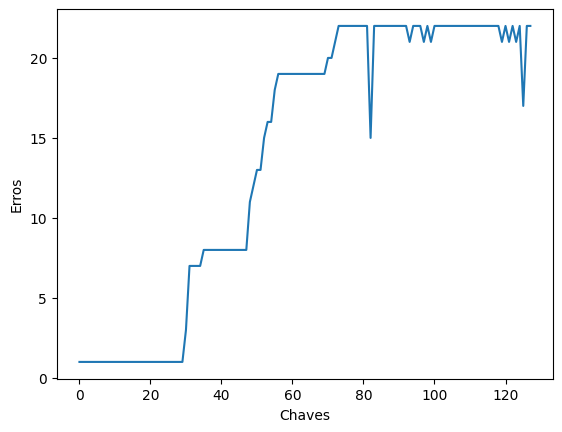

In [94]:
erros = calcula_erros(base, classificar)

plt.plot(erros)
plt.ylabel("Erros")
plt.xlabel("Chaves")
plt.show()

- Abaixo, é tomado o valor com menos erros e cria um csv, mostrando suas respostas.

In [7]:
def main():
    menor_erro = calcula_erros(base, classificar)
    classificacao = k_vizinhos_proximos(base, classificar, menor_erro)
    classificacao = pd.DataFrame(classificacao)
    classificacao.columns = ["Species"]
    classificacao.to_csv(f"melhor_classificacao_k{menor_erro}.csv")

if __name__ == "__main__":
    main()